In [2]:
from IPython.display import Image

------------------------------
#### What is Chunking & Chinking (UnChunking) in NLP?
-------------------------------

- tokenize text to words
- words to POS

- But just doing this `does not give us enough meaningful information` about the sentence. 

    - E.g. Instead of just simple tokens which may not represent the actual meaning of the text, its advisable to use phrases such as `New Delhi` as a single word instead of `New` and `Delhi` separate words.

- `Chunking` can help us here
    - is a process of breaking down a text into phrases such as 
        - Noun Phrases, 
        - Verb Phrases, 
        - Adjective Phrases, 
        - Adverb phrases, and 
        - Preposition Phrases.

- Chunks are made up of words and the kinds of words are defined using the part-of-speech tags. 

    - Chunking works on top of POS tagging, it uses pos-tags as input and provides chunks as output. 

- Similar to POS tags, there are a standard set of `Chunk tags` like `Noun Phrase` (NP), `Verb Phrase` (VP), etc. 

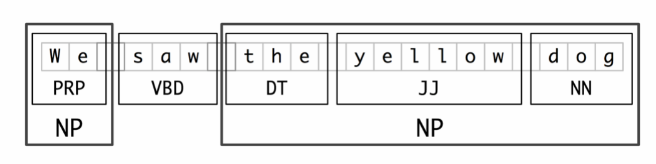

In [3]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\nlp-chunk-00.PNG', width=600)

Source ... https://www.nltk.org/book/ch07.html 

- `Segmentation` and `Labeling` at both the `Token` and `Chunk` Levels

- The smaller boxes show the `word-level` tokenization and part-of-speech tagging, 
- while the large boxes show `higher-level chunking`. 

- Each of these `larger boxes` is called a `chunk`. 

- Like tokenization, which omits whitespace, chunking usually selects a subset of the tokens. 
- Also like tokenization, the `pieces` produced by a chunker `do not overlap` in the source text.

There are 5 major categories of phrases:

| Type of phrase| Description |
| --------------| ----------- |
| Noun phrase (NP) | These are phrases where a noun acts as the head word. Noun phrases act as a subject or object to a verb.|
| Verb phrase (VP) | These phrases are lexical units that have a verb acting as the head word. Usually, there are two forms of verb phrases. One form has the verb components as well as other entities such as nouns, adjectives, or adverbs as parts of the object.|
| Adjective phrase (ADJP) | These are phrases with an adjective as the head word. Their main role is to describe or qualify nouns and pronouns in a sentence, and they will be either placed before or after the noun or pronoun.|
| Adverb phrase (ADVP) | These phrases act like adverbs since the adverb acts as the head word in the phrase. Adverb phrases are used as modifiers for nouns, verbs, or adverbs themselves by providing further details that describe or qualify them.|
| Prepositional phrase (PP) | These phrases usually contain a preposition as the head word and other lexical components like nouns, pronouns, and so on. These act like an adjective or adverb describing other words or phrases.|

#### chinking

- One can even define a pattern or words that can’t be a part of chunk and such words are known as __chinks__. 

- chinking is the process of `excluding`.

#### Noun Phrase Chunking or NP-chunking

> "the market for system-management software for digital's hardware is fragmented enough thata giant such as Computer Associates should do well there."

- [ The/DT market/NN ] for/IN [ system-management/NN software/NN ] for/IN [ Digital/NNP ] [ 's/POS hardware/NN ] is/VBZ fragmented/JJ enough/RB that/IN [ a/DT giant/NN ] such/JJ as/IN [ Computer/NNP Associates/NNPS ] should/MD do/VB well/RB there/RB ./.

- As we can see, `NP-chunks` are often `smaller` pieces than `complete noun phrases`. 

    - For example, `the market for system-management software for Digital's hardware` is a single noun phrase (containing two nested noun phrases), but it is captured in NP-chunks by the simpler chunk `the market`. 
    
    - One of the motivations for this difference is that NP-chunks are defined so as not to contain other NP-chunks. 
    
    - Consequently, any prepositional phrases or subordinate clauses that modify a nominal will not be included in the corresponding NP-chunk, since they almost certainly contain further noun phrases.

- In order to create an NP-chunker, we will first define a `chunk grammar`, consisting of rules that indicate how sentences should be chunked. 

    - This rule says that an NP chunk should be formed whenever the chunker finds 
        - an optional determiner (`DT`) followed by any number of adjectives (`JJ`) and then a noun (`NN`). 

In [4]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

#### Defining Chunk patterns

- `Chunk patterns` are normal `regular expressions` which are modified and designed to match the `part-of-speech` tag designed to match sequences of part-of-speech tags. 

- Angle brackets are used to specify an indiviual tag for example – to match a noun tag. One can define multiple tags in the same way.

In [5]:
nltk.help.upenn_tagset("NN")

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


We will consider __Noun Phrase__ Chunking and we search for chunks corresponding to an individual noun phrase. 

In order to create __NP chunk__, we define the chunk grammar using POS tags. 

We will define this using a single regular expression rule.

The rule states that whenever the chunk finds 
- an optional determiner (DT) followed by 
- any number of adjectives (JJ) and then 
- a noun (NN) then 

the Noun Phrase(NP) chunk should be formed.

In [6]:
# Step 1
parser = nltk.chunk.RegexpParser('''
                            NP: {<DT>? <JJ>* <NN>*} # NP
                            P: {<IN>}               # Preposition
                            V: {<V.*>}              # Verb
                            PP: {<P> <NP>}          # PP -> P NP
                            VP: {<V> <NP|PP>*}      # VP -> V (NP|PP)*
                            ''')

In [7]:
# example
grammar = """
	NP:   {<PRP>?<JJ.*>*<NN.*>+}
	CP:   {<JJR|JJS>}
	VERB: {<VB.*>}
	THAN: {<IN>}
	COMP: {<DT>?<NP><RB>?<VERB><DT>?<CP><THAN><DT>?<NP>}
	"""

In [8]:
# Step 2
chunker = nltk.chunk.RegexpParser(grammar)

#### Typical process of chunk extraction

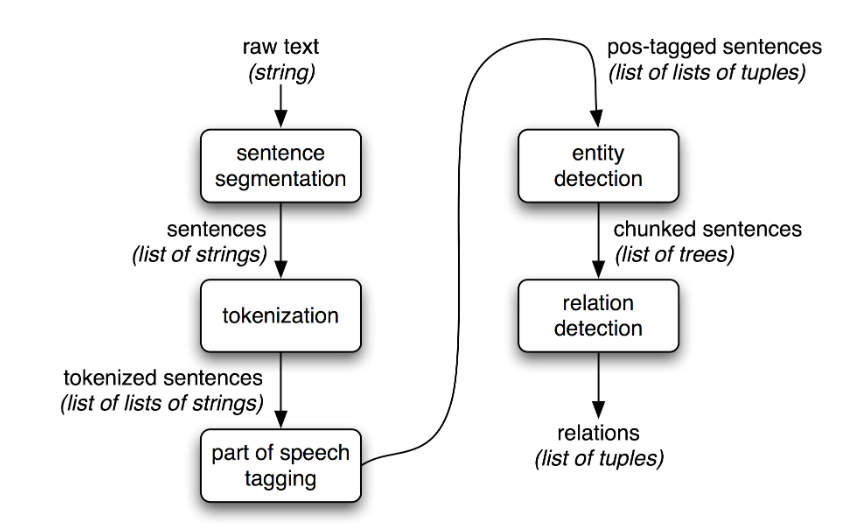

In [9]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\IE-chunking-00.PNG', width=600)

sample text

In [10]:
text = "the little yellow dog barked at the large silly cat"

In [11]:
sentences = nltk.sent_tokenize(text) 
sentences

['the little yellow dog barked at the large silly cat']

In [12]:
sent_tokens = [nltk.word_tokenize(sent) for sent in sentences]
sent_tokens

[['the',
  'little',
  'yellow',
  'dog',
  'barked',
  'at',
  'the',
  'large',
  'silly',
  'cat']]

In [13]:
token_pos = [nltk.pos_tag(sent) for sent in sent_tokens]
token_pos

[[('the', 'DT'),
  ('little', 'JJ'),
  ('yellow', 'JJ'),
  ('dog', 'NN'),
  ('barked', 'VBD'),
  ('at', 'IN'),
  ('the', 'DT'),
  ('large', 'JJ'),
  ('silly', 'JJ'),
  ('cat', 'NN')]]

In [14]:
# Define your grammar using regular expressions
grammar = ('''
            Noun chunks ... : {<DT>?<JJ>*<NN.*>}               # NP
            ''')

In [15]:
cp     = nltk.RegexpParser(grammar)
result = cp.parse(token_pos[0])

print (result)

(S
  (Noun chunks ... the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (Noun chunks ... the/DT large/JJ silly/JJ cat/NN))


In [16]:
result.draw()

another example ...extract `NOUN` or `VERB` chunks ...

In [17]:
# POS tagging
sent = "This will be chunked. This is for Test. World is awesome. Hello world."

#print(nltk.pos_tag(word_tokenize(sent)))

# creating a regular expression for chunking verbs and nouns
chunkRule = r"""Noun OR VERB chunks ... : {<NN.?>*<NNS.?>*<NNP.?>*<NNPS.?>*<VB.?>*<VBD.?>*<VBG.?>*<VBN.?>*<VBP.?>*<VBZ.?>*}"""

My_parser = nltk.RegexpParser(chunkRule)
chunked = My_parser.parse(nltk.pos_tag(word_tokenize(sent)))

print(chunked)

(S
  This/DT
  will/MD
  (Noun OR VERB chunks ... be/VB chunked/VBN)
  ./.
  This/DT
  (Noun OR VERB chunks ... is/VBZ)
  for/IN
  (Noun OR VERB chunks ... Test/NNP)
  ./.
  (Noun OR VERB chunks ... World/NNP is/VBZ)
  awesome/JJ
  ./.
  (Noun OR VERB chunks ... Hello/NNP world/NN)
  ./.)


only extract `noun` chunks ...

In [19]:
# POS tagging
sent = "This will be chunked. This is for Test. World is awesome. Hello world."

#print(nltk.pos_tag(word_tokenize(sent)))

# creating a regular expression for chunking verbs and nouns
chunkRule = r"""Found chunk... : {<NN.?>*<NNS.?>*<NNP.?>*<NNPS.?>*}"""

My_parser = nltk.RegexpParser(chunkRule)
chunked = My_parser.parse(nltk.pos_tag(word_tokenize(sent)))

print(chunked)

(S
  This/DT
  will/MD
  be/VB
  chunked/VBN
  ./.
  This/DT
  is/VBZ
  for/IN
  (Found chunk... Test/NNP)
  ./.
  (Found chunk... World/NNP)
  is/VBZ
  awesome/JJ
  ./.
  (Found chunk... Hello/NNP world/NN)
  ./.)


only extract `verb` chunks ... 

In [20]:
# POS tagging
sent = "This will be chunked. This is for Test. World is awesome. Hello world."

#print(nltk.pos_tag(word_tokenize(sent)))

# creating a regular expression for chunking verbs and nouns
chunkRule = r"""VERB chunks ... : {<VB.?>*<VBD.?>*<VBG.?>*<VBN.?>*<VBP.?>*<VBZ.?>*}"""

My_parser = nltk.RegexpParser(chunkRule)
chunked   = My_parser.parse(nltk.pos_tag(word_tokenize(sent)))

print(chunked)

(S
  This/DT
  will/MD
  (VERB chunks ... be/VB chunked/VBN)
  ./.
  This/DT
  (VERB chunks ... is/VBZ)
  for/IN
  Test/NNP
  ./.
  World/NNP
  (VERB chunks ... is/VBZ)
  awesome/JJ
  ./.
  Hello/NNP
  world/NN
  ./.)


In [155]:
# draw the tree
chunked.draw()

another example ... we will be chunking all the tags and excluding nouns.

In [21]:
sent = "This will be the day that I will chink all the nouns. Everything will be there. Except nouns"

print(nltk.pos_tag(word_tokenize(sent)))

# first chunk everything and chink only nouns
chunkRule = r"""Chunk ... : {<.*>+}
                            }<NN.?|NNS|NNP|NNPS>+{"""

MyParser = nltk.RegexpParser(chunkRule)
chunked = MyParser.parse(nltk.pos_tag(word_tokenize(sent)))

#chunked.draw()
print(chunked)

[('This', 'DT'), ('will', 'MD'), ('be', 'VB'), ('the', 'DT'), ('day', 'NN'), ('that', 'IN'), ('I', 'PRP'), ('will', 'MD'), ('chink', 'VB'), ('all', 'PDT'), ('the', 'DT'), ('nouns', 'NNS'), ('.', '.'), ('Everything', 'NN'), ('will', 'MD'), ('be', 'VB'), ('there', 'RB'), ('.', '.'), ('Except', 'IN'), ('nouns', 'NNS')]
(S
  (Chunk ... This/DT will/MD be/VB the/DT)
  day/NN
  (Chunk ... that/IN I/PRP will/MD chink/VB all/PDT the/DT)
  nouns/NNS
  (Chunk ... ./.)
  Everything/NN
  (Chunk ... will/MD be/VB there/RB ./. Except/IN)
  nouns/NNS)


In [22]:
sent = "Google is buying Microsoft"

print(nltk.pos_tag(word_tokenize(sent)))

# first chunk everything and chink only nouns
chunkRule = r"""Chunk ... : {<.*>+}
                            }<NN.?|NNS|NNP|NNPS>+{"""

MyParser = nltk.RegexpParser(chunkRule)
chunked = MyParser.parse(nltk.pos_tag(word_tokenize(sent)))

#chunked.draw()
print(chunked)

[('Google', 'NN'), ('is', 'VBZ'), ('buying', 'VBG'), ('Microsoft', 'NNP')]
(S Google/NN (Chunk ... is/VBZ buying/VBG) Microsoft/NNP)


Another example ...

In [24]:
PATTERN = r"""
            NP: {<NN><NN>+}
                {<ADJ><NN>+}
            """

cp = nltk.RegexpParser(PATTERN)
print(cp.parse(token_pos[0]))

(S
  the/DT
  little/JJ
  yellow/JJ
  dog/NN
  barked/VBD
  at/IN
  the/DT
  large/JJ
  silly/JJ
  cat/NN)


another example .. with `chinking` or `UnChunk`

In [25]:
from nltk.tree import Tree
from nltk.chunk.regexp import ChunkString, ChunkRule, UnChunkRule

In [26]:
text      = "the book has many chapters"

sentences   = nltk.sent_tokenize(text) 
sent_tokens = [nltk.word_tokenize(sent) for sent in sentences]
token_pos   = [nltk.pos_tag(sent) for sent in sent_tokens]

tree = Tree('S', token_pos[0])

print(tree)

# Initializing ChunkString()
chunk_string = ChunkString(tree)
print ("Chunk String : ", chunk_string)

# Initializing ChunkRule
#chunk_rule = ChunkRule('<DT><NN.*><.*>*<NN.*>', 'chunk determiners and nouns')
chunk_rule = ChunkRule('<DT>?<JJ>*<NN>', 'chunk determiners and nouns')
chunk_rule.apply(chunk_string)
print ("Applied ChunkRule : ", chunk_string)

# Another ChinkRule
unchunk_rule = UnChunkRule('<VB.*>', 'chink verbs')
unchunk_rule.apply(chunk_string)
print ("Applied UnChunkRule : ", chunk_string)

# print ("Applied ChinkRule : ", chunk_string, "\n")
# # Back to chunk sub-tree
# print(chunk_string.to_chunkstruct())

(S the/DT book/NN has/VBZ many/JJ chapters/NNS)
Chunk String :   <DT>  <NN>  <VBZ>  <JJ>  <NNS> 
Applied ChunkRule :  {<DT>  <NN>} <VBZ>  <JJ>  <NNS> 
Applied UnChunkRule :  {<DT>  <NN>} <VBZ>  <JJ>  <NNS> 


#### Example - simple chunk grammar consisting of 2 rules. 

- The first rule matches an optional determiner or possessive pronoun, zero or more adjectives, then a noun. 
- The second rule matches one or more proper nouns. 

In [27]:
grammar = r"""
          NP: {<DT|PP\$>?<JJ>*<NN>}   # chunk determiner/possessive, adjectives and nouns
              {<NNP>+}                # chunk sequences of proper nouns
        """
cp = nltk.RegexpParser(grammar)

sentence = [("Rapunzel", "NNP"), ("let", "VBD"), ("down", "RP"), 
            ("her", "PP$"), ("long", "JJ"), ("golden", "JJ"), ("hair", "NN")]

print (cp.parse(sentence))

(S
  (NP Rapunzel/NNP)
  let/VBD
  down/RP
  (NP her/PP$ long/JJ golden/JJ hair/NN))


#### Example

If a tag pattern matches at overlapping locations, the leftmost match takes precedence. For example, if we apply a rule that matches two consecutive nouns to a text containing three consecutive nouns, then only the first two nouns will be chunked:

In [28]:
nouns   = [("money", "NN"), ("market", "NN"), ("fund", "NN")]
grammar = "NP: {<NN><NN>}  # Chunk two consecutive nouns"

cp = nltk.RegexpParser(grammar)
print (cp.parse(nouns))

(S (NP money/NN market/NN) fund/NN)


In [29]:
nouns   = [("money", "NN"), ("market", "NN"), ("fund", "NN")]
grammar = "NP: {<NN>+}  # All nouns"

cp = nltk.RegexpParser(grammar)

print (cp.parse(nouns))

(S (NP money/NN market/NN fund/NN))


#### 2. Using chunk patterns

In [30]:
# POS tagging
sent = "This will be chunked. This is for Test. World is awesome. Hello world."

# creating a regular expression for chunking verbs and nouns
chunkRule = r"""chunk: {<NN.?>*<NNS.?>*<NNP.?>*<NNPS.?>*<VB.?>*<VBD.?>*<VBG.?>*<VBN.?>*<VBP.?>*<VBZ.?>*}"""

My_parser = nltk.RegexpParser(chunkRule)
chunked   = My_parser.parse(nltk.pos_tag(word_tokenize(sent)))

print(chunked)

(S
  This/DT
  will/MD
  (chunk be/VB chunked/VBN)
  ./.
  This/DT
  (chunk is/VBZ)
  for/IN
  (chunk Test/NNP)
  ./.
  (chunk World/NNP is/VBZ)
  awesome/JJ
  ./.
  (chunk Hello/NNP world/NN)
  ./.)


In [74]:
# draw the tree
chunked.draw()

#### Ex

In [31]:
from nltk.chunk import *
from nltk.chunk.util import *
from nltk.chunk.regexp import *
from nltk import Tree

In [32]:
from nltk import Tree

In [33]:
tagged_text = "[ The/DT cat/NN ] sat/VBD on/IN [ the/DT mat/NN ] [ the/DT dog/NN ] chewed/VBD ./."

In [34]:
gold_chunked_text = tagstr2tree(tagged_text)

In [35]:
print(gold_chunked_text)

(S
  (NP The/DT cat/NN)
  sat/VBD
  on/IN
  (NP the/DT mat/NN)
  (NP the/DT dog/NN)
  chewed/VBD
  ./.)


#### using NLTK ne_chunks

In [36]:
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree

In [37]:
def get_continuous_chunks(text):
    chunked          = ne_chunk(pos_tag(word_tokenize(text)))
    
    continuous_chunk = []
    current_chunk    = []
    
    for i in chunked:
        if type(i) == Tree:
            current_chunk.append(" ".join([token for token, pos in i.leaves()]))
        if current_chunk:
            named_entity = " ".join(current_chunk)
        if named_entity not in continuous_chunk:
            continuous_chunk.append(named_entity)
            current_chunk = []
        else:
            continue
            
    return continuous_chunk

In [38]:
my_sent = '''WASHINGTON -- In the wake of a string of abuses by New York police officers in the 1990s, \
            Loretta E. Lynch, the top federal prosecutor in Brooklyn, spoke forcefully about the pain \ 
            of a broken trust that African-Americans felt and said the responsibility for repairing \ 
            generations of miscommunication and mistrust fell to law enforcement.'''

In [39]:
text = '''Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.
Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover 
without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular 
disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease 
it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an 
alcohol based rub frequently and not touching your face. 
The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected 
person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing 
into a flexed elbow).
At this time, there are no specific vaccines or treatments for COVID-19. However, there are many ongoing clinical 
trials evaluating potential treatments. WHO will continue to provide updated information as soon as clinical 
findings become available.'''

In [40]:
get_continuous_chunks(text)

['Coronavirus']

In [41]:
get_continuous_chunks(my_sent)

['WASHINGTON', 'New York', 'Loretta E. Lynch', 'Brooklyn']

#### using text blob

In [42]:
from textblob import TextBlob

In [43]:
%%time
blob = TextBlob(text)
blob.noun_phrases

Wall time: 4.52 s


WordList(['coronavirus', 'covid-19', 'infectious disease', 'covid-19', 'experience mild', 'moderate respiratory illness', 'special treatment', 'older', 'medical problems', 'cardiovascular disease', 'chronic respiratory disease', 'serious illness', 'covid-19', 'protect', 'covid-19', 'person coughs', '’ s', 'practice respiratory etiquette', 'specific vaccines', 'covid-19', 'clinical trials', 'potential treatments', 'who', 'clinical findings'])

#### Ex - same example using nltk pos

In [44]:
# function to test if something is a noun
is_noun = lambda pos: pos[:2] == 'NN'

In [45]:
%%time
tokenized = nltk.word_tokenize(text)
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 

print (nouns)

['Coronavirus', 'disease', 'COVID-19', 'disease', 'coronavirus', 'people', 'COVID-19', 'virus', 'mild', 'respiratory', 'illness', 'treatment', 'people', 'problems', 'disease', 'respiratory', 'disease', 'cancer', 'illness', 'way', 'transmission', 'COVID-19', 'virus', 'disease', 'others', 'infection', 'hands', 'alcohol', 'rub', 'face', 'virus', 'spreads', 'droplets', 'saliva', 'discharge', 'nose', 'person', 'coughs', 'sneezes', 'practice', 'respiratory', 'etiquette', 'example', 'elbow', 'time', 'vaccines', 'treatments', 'COVID-19', 'trials', 'treatments', 'information', 'findings']
Wall time: 18 ms


## Chinking

Sometimes it is easier to define what we want to exclude from a chunk. We can define a chink to be a sequence of tokens that is not included in a chunk. In the following example, __barked/VBD at/IN__ is a chink:

__[ the/DT little/JJ yellow/JJ dog/NN ] barked/VBD at/IN [ the/DT cat/NN ]__

Chinking is the process of removing a sequence of tokens from a chunk. If the matching sequence of tokens spans an entire chunk, then the whole chunk is removed; if the sequence of tokens appears in the middle of the chunk, these tokens are removed, leaving two chunks where there was only one before. If the sequence is at the periphery of the chunk, these tokens are removed, and a smaller chunk remains. 

|                | Entire chunk           | Middle of a chunk        |End of a chunk            |
|----------------|----------------        |------------------------  |------------------------  |
|Input	         |[a/DT little/JJ dog/NN] |[a/DT little/JJ dog/NN]   |[a/DT little/JJ dog/NN]   |
|Operation       |Chink "DT JJ NN"        |Chink "JJ"                |Chink "NN"                |
|Pattern	     |}DT JJ NN{              |	}JJ{                     |	}NN{                    |
|Output	         |a/DT little/JJ dog/NN   |	[a/DT] little/JJ [dog/NN]|	[a/DT little/JJ] dog/NN |

In [95]:
grammar = r"""
  NP:
    {<.*>+}          # Chunk everything
    }<VBD|IN>+{      # Chink sequences of VBD and IN
  """
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),
       ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]
cp = nltk.RegexpParser(grammar)

In [96]:
print (cp.parse(sentence))

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


## Representing Chunks: Tags vs Trees

__chunk__ structures can be represented using either __tags__ or __trees__. 

The most widespread file representation uses __IOB__ tags. 

In this scheme, each token is tagged with one of 3 special __chunk tags__, 
- I (inside), 
- O (outside), or 
- B (begin). 

- A token is tagged as __B if it marks the beginning of a chunk__. 
- Subsequent tokens within the chunk are tagged I. 
- All other tokens are tagged O.

The B and I tags are suffixed with the chunk type, e.g. B-NP, I-NP. 

Of course, it is not necessary to specify a chunk type for tokens that appear outside a chunk, so these are just labeled O

In [102]:
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import conlltags2tree, tree2conlltags

In [103]:
tree = ne_chunk(pos_tag(word_tokenize("New York is my favorite city")))

In [104]:
print (tree)

(S (GPE New/NNP York/NNP) is/VBZ my/PRP$ favorite/JJ city/NN)


In [105]:
iob_tags = tree2conlltags(tree)
print (iob_tags)

[('New', 'NNP', 'B-GPE'), ('York', 'NNP', 'I-GPE'), ('is', 'VBZ', 'O'), ('my', 'PRP$', 'O'), ('favorite', 'JJ', 'O'), ('city', 'NN', 'O')]


In [106]:
tree = conlltags2tree(iob_tags)
print (tree)

(S (GPE New/NNP York/NNP) is/VBZ my/PRP$ favorite/JJ city/NN)


_____________________________________________________________